In [104]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.style.use('science')

Ποσοστιαία Απόκλιση

Σχετική απόκλιση

Σχετικό σφάλμα

(just in case)

In [105]:
def perc_dev(x_theor, x_exp):
	return abs(x_theor-x_exp)*100/x_theor

def relative_dev(x_theor, x_exp, sigma):
	return abs(x_theor-x_exp)/sigma

def relative_error(x_exp, sigma):
	return 100*sigma/x_exp

\begin{equation*}
	B = \left(\frac{4}{5}\right)^{3/2}n\mu_0 \frac{I}{R}
\end{equation*}

$$\boxed{\mu_0 = 1.257\cdot 10^{-6}Tm/A\; , \; \; n=130\; , \; R=150mm}$$

B Fit function:

$$B(I) = aI + b$$
$$\Downarrow$$

In [106]:
def B_fit(x, a):
	return a*x

Read the b-field data from a .txt file

Fit a linear function

Plot both the data and the function

[0.76967791]
[0.00294495]


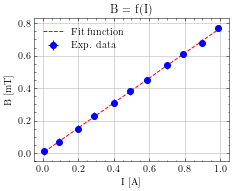

In [107]:
b_data = np.loadtxt('b_data.txt')
x = b_data[:,0]
y = b_data[:,2]
x_error = b_data[:,1]
y_error = b_data[:,3]



popt, pcov = curve_fit(B_fit, x, y)

print(popt)
print(np.sqrt(np.diag(pcov)))

range = np.linspace(np.min(x), np.max(x), 100)

plt.title(r'B = f(I)')
plt.xlabel(r'I [A]')
plt.ylabel(r'B [mT]')
plt.grid()
plt.errorbar(x, y, y_error, x_error, 'bo')
plt.plot(range, B_fit(range, *popt), 'r--')
plt.legend(['Fit function', 'Exp. data'])
plt.savefig('b_field.png', dpi=500)

Therefore, the equation that describes the magnetic field is:

$$B(I) = (0.767\pm 0.006)\cdot I + 0.002\pm 0.003$$
$$\Downarrow$$
$$B(I) = 0.767\cdot I + 0.002$$
$$\Delta B(I) = 0.006\cdot I + 0.003$$

In [108]:
V_data = np.loadtxt('data.txt')
V = V_data[:,0]
V_error = V_data[:,1]
Brav = V_data[:,2]/4
Brav_error = V_data[:,3]/4

In [109]:
def linear (x, a, b):
	return a/2 *x + b

In [110]:
popt1, pcov1 = curve_fit(linear, Brav, V)
print(popt1)
print(np.sqrt(np.diag(pcov1)))

[ 15.44905523 113.77636583]
[1.12978442 7.43568509]


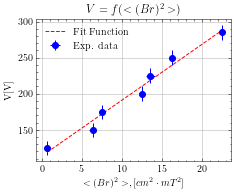

In [111]:
plt.errorbar(Brav, V, V_error, Brav_error, 'bo')
plt.grid()
x = np.linspace(np.min(Brav), np.max(Brav), 100)
plt.plot(x, linear(x, *popt1), 'r--')
plt.ylabel(r'V[V]')
plt.xlabel(r'$<(Br)^2>, [cm^2\cdot mT^2]$')
plt.title(r'$V = f(<(Br)^2>)$')
plt.legend(['Fit Function', 'Exp. data'])
plt.savefig('v_br.png', dpi=500)

In [112]:
print(perc_dev(1.758*10**11, popt1[0]*10**10))
print(relative_dev(1.758*10**11, popt1[0]*10**10,np.sqrt(np.diag(pcov1))[0]*10**10))
print(relative_error(popt1[0]*10**10,np.sqrt(np.diag(pcov1))[0]*10**10))

12.121415097716191
1.886151666789793
7.312967733927498
